In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os
import pandas as pd
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
loc_train = os.getenv("LOC_PRE_TRAIN")
loc_test = os.getenv("LOC_PRE_TEST")

In [4]:
df_train = pd.read_csv(loc_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
obj_cols = [c for c,dt in df_train.dtypes.items() if dt=="object"]
df_train[obj_cols] = df_train[obj_cols].astype("category")

In [6]:
df_test = pd.read_csv(loc_test)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [7]:
obj_cols = [c for c,dt in df_test.dtypes.items() if dt=="object"]
df_test[obj_cols] = df_test[obj_cols].astype("category")

In [8]:
train_y = df_train["SalePrice"]
train_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [9]:
train_X = df_train.drop("SalePrice",axis=1)
train_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    train_X, train_y, train_size=0.7, random_state=42)


In [18]:
print(X_train.shape,X_val.shape)

(1021, 75) (439, 75)


In [11]:
model = lgbm.LGBMRegressor(learning_rate=0.01,n_estimators=900,max_depth=5)

In [12]:
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)],eval_metric="rmse",callbacks=[lgbm.early_stopping(10)])

/mnt/f/Kaggle/Housing-Prices/.venv/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/mnt/f/Kaggle/Housing-Prices/.venv/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[545]	training's rmse: 17748.2	training's l2: 3.14998e+08	valid_1's rmse: 25925.2	valid_1's l2: 6.72115e+08


LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=900)

In [13]:
eval_results = model.evals_result_
losses = pd.DataFrame()
losses["training"] = eval_results["training"]['rmse']
losses["validation"] = eval_results["valid_1"]['rmse']
losses.head()

,training,validation
0,77004.965820,82820.235797
1,76400.230968,82197.168094
2,75804.987333,81581.929400
3,75214.808971,80973.574923
4,74632.601695,80377.405406


<AxesSubplot:ylabel='training'>

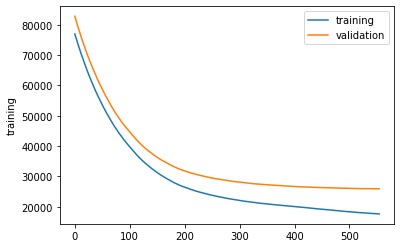

In [14]:
sns.lineplot(data=losses,x=losses.index,y="training",label="training")
sns.lineplot(data=losses,x=losses.index,y="validation",label="validation")

In [15]:
output = pd.DataFrame()
output["Id"] = df_test["Id"]
output["SalePrice"] = model.predict(df_test)
output.head()

,Id,SalePrice
0,1461,126692.309680
1,1462,150305.973188
2,1463,189249.006540
3,1464,189834.992751
4,1465,191694.598497


In [16]:
output.to_csv("../submission.csv",index=None)